# RL and Rando Agents in a Bandit Task with Punishment

## Introduction
In this notebook, we are once again studying exploration in the k-armed bandit task.

We will look at what happens when a RL agent is faced with an additional probability of punishment attached to each arm. Each arm will have a chance to provide a reward, a punishment, or nothing. We will look at how the performance of the RL agent compares with the Rando agent as the probabilities of reward/punishment change in the nonoptimal and optimal arms of the bandit task, and also when the reward/punishment values change in magnitude.

## Environment: The Bandit Task with Punishment
In this project, we study exploration in the a version of the abstract *k-armed bandit task*.

- In this task, there are *k* actions to take. We specifially look at a 4-armed bandit task.
- Each action returns an outcome *O*.
  - There is a probability *p_reward* chance of the action returning a reward *R*.
  - There is a probability *p_punishment* chance of the action returning a punishment $P$.
  - There is a 1 - $R - P$ chance of the action returning nothing.
- The reward value $R$ is default 1, while the reward value $P$ is default -1, while an outcome of nothing is default 0. However, the $R$ and $P$ values can be changed.

For the purpose of this notebook to better visualize the effect, the optimal arm is always Arm 2 of our four-armed bandit task.


## Agents
In this notebook, we will be comparing the performance of two agents: our rando agent, and our epsilon-greedy policy agent.

The rando agent will randomly choose one of the arms/actions. It will not change how it chooses based on what the outcome of its action is.

Our epsilon-greedy agent will use action-value learning, and more specifically, reinforcement learning. So, we sometimes refer to it as our RL agent throughout the notebook.

At each decision point, the epsilon-greedy agent will either choose a random arm at a probability of ϵ, or continue to exploit the current--to its knowledge--best arm at a probability of 1 - ϵ. Our epsilon-greedy agent will evaulate its current options using Q-learning using the following update rule:


$ Q \leftarrow Q + \alpha * (O - Q) $ [1]

Where the learning rate on the reward prediction error ($R-Q$) is denoted as $\alpha$. $Q$ is trying to approximate the average reward value of each arm. $O$ is the outcome of the action, which will be either $R$ (a reward) or $P$ (a punishment) or $0$ (nothing).



## Goals
Our overarching goal is to understand how introducing punishment into the k-armed bandit task might affect how well the RL agent performs compared to the Rando agent. More specifically, we aim to understand how...

(Section 1) the probabilities of reward/punishment in a bandit task's non-optimal arm

(Section 2) the probability of punishment in a bandit task's optimal arm

(Section 3) the magnitude of punishment/reward

might affect how the RL agent performs compared to the Rando agent. So we vary these three parts of the environment to understand that.

## Metric
Our metric of interest is the pattern of behavior of the RL and Rando agents in the k-armed bandit task, specifically measured as the total reward that the RL and Rango agents get on their runs, averaged across 100 runs to account for noise and randomness.

## Hypotheses
Generally, we believe that when the nonoptimal arms of the bandit task have expected values closer to the the expected value of the optimal arm, the RL agent will struggle to distinguish the optimal and nonoptimal arms and struggle to find the optimal arm, resulting in it exploiting a nonoptimal arm and performing similar to or worse than the Rando agent. Thus, we think that...

Section 1: The RL agent will perform better than the Rando agent when there is a higher probability of punishment for the nonoptimal arms, but it will perform similar to or worse than the Rando agent when there is a higher probability of reward for the nonoptimal arms.

Section 2: The RL agent will perform better than the Rando agent when the probability of punishment in the optimal arm is low, but it will perform similar to or worse than the Rando agent when there is a higher probability of punishment in the optimal arm.

Section 3: The RL agent will perform better than the Rando agent when the magnitude of punishment is high, but the RL agent will perform similar to or worse than the Rando agent when the magnitude of the reward is high (across all arms).

## Significance and Broader Relevance

The big question that this project seeks to answer is how the RL agent performs in an environment with punishment—is the RL agent truly good (eg better than the Rando agent) at exploration (defined as finding rewards) when there is punishment? Testing the RL agent in environments with punishment validates if the RL agent is good at exploration in an environment that is more similar to the real world. In real life, it is rarely about just collecting rewards—there are obstacles and negative events that occur in response to an action. We simulate these negative consequences to actions or "punishments" in our project. After all, real life isn't just about finding food—sometimes, someone is chasing you as well. It is important to simulate exploration in an environment that more strongly resembles the real world.


## Install and import needed modules

In [ ]:
# Install explorationlib?
!pip install --upgrade git+https://github.com/avani-guduri/bixexplorationlib
!pip install --upgrade git+https://github.com/MattChanTK/gym-maze.git

  Cloning https://github.com/avani-guduri/bixexplorationlib to /tmp/pip-req-build-bvi200hl
  Running command git clone --filter=blob:none --quiet https://github.com/avani-guduri/bixexplorationlib /tmp/pip-req-build-bvi200hl
  Resolved https://github.com/avani-guduri/bixexplorationlib to commit 5d877bf4f37fcd22b69e1f023d3a514c02c2508b
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/MattChanTK/gym-maze.git to /tmp/pip-req-build-_owovytq
  Running command git clone --filter=blob:none --quiet https://github.com/MattChanTK/gym-maze.git /tmp/pip-req-build-_owovytq
  Resolved https://github.com/MattChanTK/gym-maze.git to commit 83176811b49b5538a6213520612f44fb1bc49114
  Preparing metadata (setup.py) ... done


### Import modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

import explorationlib

# Agents
from explorationlib.agent import BanditActorCritic
from explorationlib.agent import Critic
from explorationlib.agent import EpsilonActor
from explorationlib.agent import RandomActor

# Exp
from explorationlib.run import experiment
from explorationlib.score import action_entropy
from explorationlib.util import select_exp
from explorationlib.util import load
from explorationlib.util import save

# Vis
from explorationlib.plot import plot_bandit
from explorationlib.plot import plot_bandit_punishment
from explorationlib.plot import plot_bandit_actions
from explorationlib.plot import plot_bandit_critic
from explorationlib.plot import plot_bandit_hist

# Score
from explorationlib.score import total_reward

# Env
from explorationlib.local_gym import BanditUniform4
from explorationlib.local_gym import BanditPunishmentUniform4


### Config notebook

In [ ]:
# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

# Dev
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Shared code

For the project, we are manipulating the environment (aka the bandit task) that the Rando and RL agents act within. Since the bandit task environment was created in explorationlib, we created a copy of explorationlib and edited it to include punishment, more specifically we created three new functions to replace three old ones.

We created...
1) BanditPunishmentEnv to replace BanditEnv (in local_gym.py)
2) BanditPunishmentUniform4 to replace BanditUniform4 (in local_gym.py)
3) plot_bandit_punishment to replace plot_bandit since this plotting function depends on the structure of the environment (in plot.py)

You can access this code here: https://github.com/avani-guduri/bixexplorationlib/tree/main/explorationlib

## Section 1 - Reward and Punishment Probabilities of Nonoptimal Arms
In this section, we aim to understand how changing the reward and punishment probabilities of the nonoptimal arms (Arms 0, 1, and 3) might affect how the RL agent performs compared to the Rando agent.

The probability of a reward or a punishment in any nonoptimal arm is chosen based on a range: the p_reward is chosen from the range [p_min_reward, p_max_reward] and the p_punishment is chosen from the range [p_min_punishment, p_max_punishment]. In Lab 9, we used a range of 0.1-0.3 to choose the probability of a reward. In this section, we once again use the range 0.1-0.3 as a default for the p_reward and p_punishment ranges and further vary these ranges to look at 5 different environments:

**Environment 1 - Stronger Punishment Chance**

p_reward range: 0.1 - 0.3

p_punishment range: 0.3 - 0.5

**Environment 2 - Strong Punishment Chance**

p_reward range: 0.1 - 0.3

p_punishment range: 0.2 - 0.4

**Environment 3 - Equal Reward and Punishment Chances**

p_reward range: 0.1 - 0.3

p_punishment range: 0.1 - 0.3

**Environment 4 - Strong Reward Chance**

p_reward range: 0.2 - 0.4

p_punishment range: 0.1 - 0.3

**Environment 5 - Stronger Reward Chance**

p_reward range: 0.3 - 0.5

p_punishment range: 0.1 - 0.3

First, let's create our environments so we can run our rando and RL agents on them!

In [ ]:
# Creating the environments and storing them in a list

# list containing the different probability sets we use to create the environments
# each probability set is stored as a list: [p_min_reward, p_max_reward, p_min_punishment, and p_max_punishment]
p_ranges = [ [0.1, 0.3, 0.3, 0.5],
             [0.1, 0.3, 0.2, 0.4],
             [0.1, 0.3, 0.1, 0.3],
             [0.2, 0.4, 0.1, 0.3],
             [0.3, 0.5, 0.1, 0.3] ]

environments = [] # list of environments
env_names = ["Stronger Punishment Chance", "Strong Punishment Chance",
             "Equal Reward and Punishment Chances", "Strong Reward Chance",
             "Stronger Reward Chance"]

# actually creating the environments
for p_range in p_ranges:
  env = BanditPunishmentUniform4(p_min_reward=p_range[0], p_max_reward=p_range[1],
                               p_min_punishment=p_range[2], p_max_punishment=p_range[3],
                               p_best_reward=0.5, p_best_punishment=0.1,
                               reward_val=1, punishment_val=-1)
  environments.append(env)



Before we run our agents, let's better visualize what each of our five environments look like by creating a graph of the expected value of each arm. Keep in mind that the optimal arm in each environment is always Arm 2.

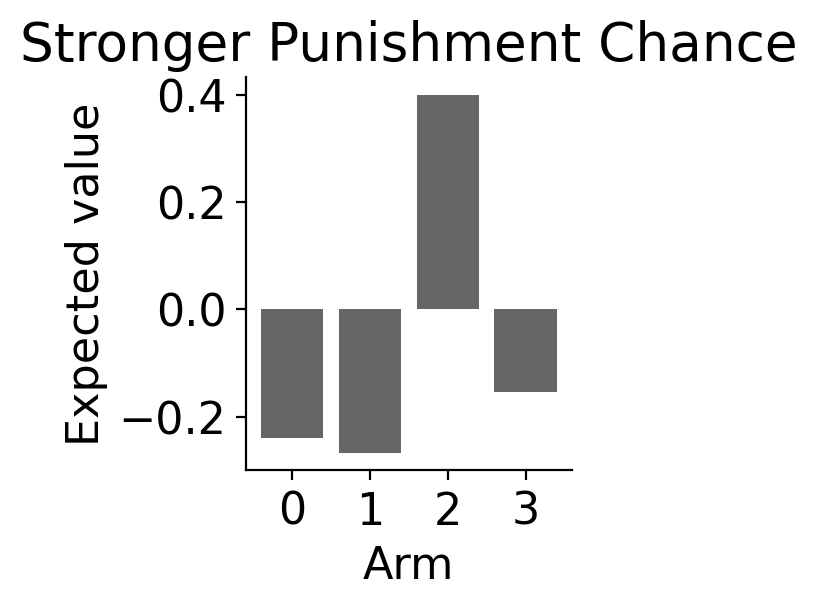

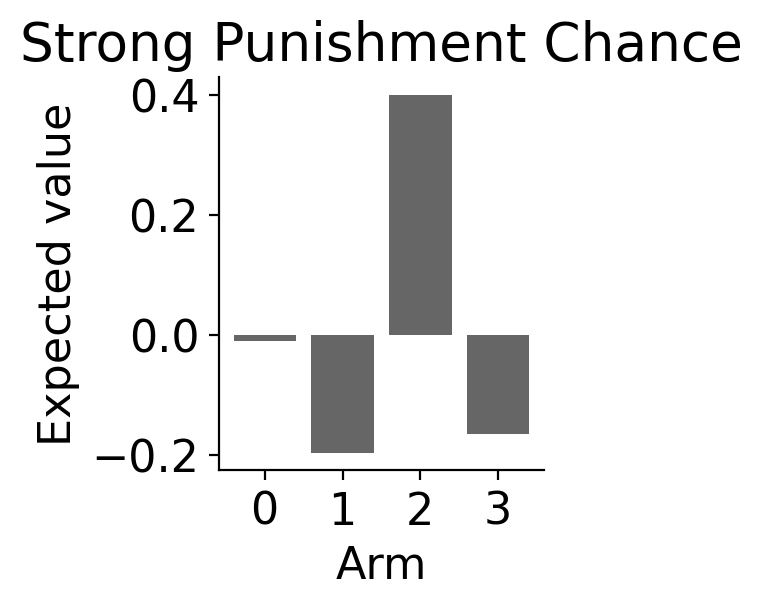

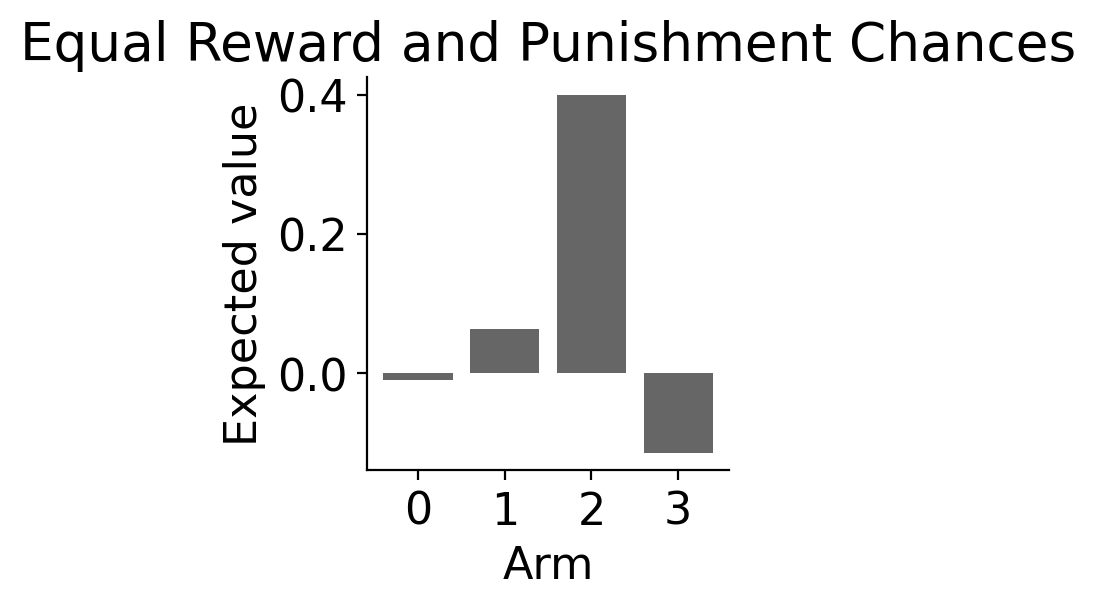

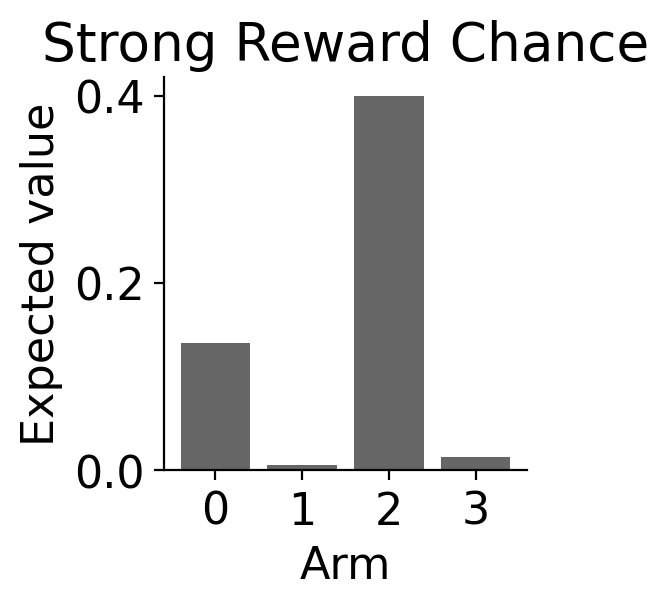

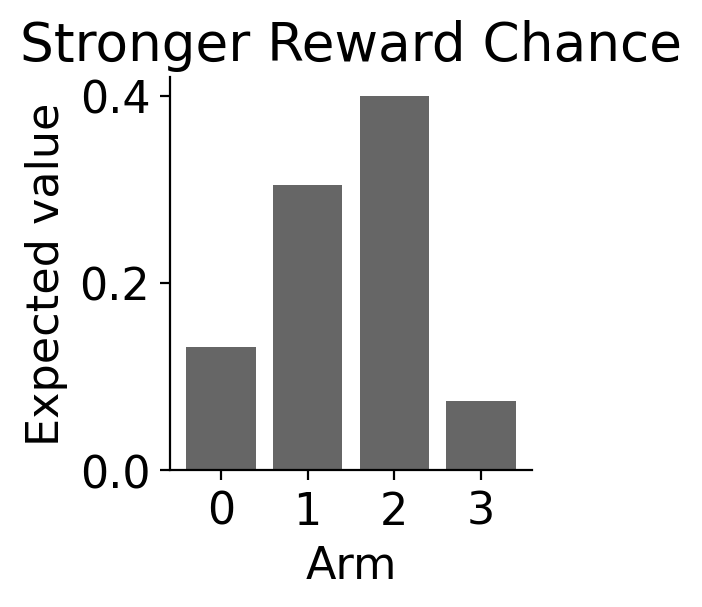

In [ ]:
# Let's visualize what each of our environments look like by seeing the expected values of each arm

num_experiments = 100
seed = 5030

i = 0
for env in environments:
  env.seed(seed)
  plot_bandit_punishment(env, alpha=0.6, title=env_names[i])
  i += 1

As the reward (eg "Stronger Reward Chance") increases for the nonoptimal arms, you can see the expected value of the nonoptimal arms (Arm 0, 1, and 3) creep up closer to the expected value of the optimal arm (Arm 2).


Now that we have our environments set up, let's create our agents. As previously stated in the Agents section, we have two agents: the RandomActor (our rando agent) and the EpsilonActor (our RL agent).

In [ ]:
# Creating our two agents using each environment's number of inputs

ran = BanditActorCritic(
    RandomActor(num_actions=env.num_arms),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

epy = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=0.15),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# Setting up lists to make plotting easier later
agents = [ran, epy, ran, epy, ran, epy, ran, epy, ran, epy]
names_vertical = ["random\nstronger\npunishment", "RL\nstronger\npunishment",
         "random\nstrong\npunishment", "RL\nstrong\npunishment",
         "random\nequal\nchances", "RL\nequal\nchances",
         "random\nstrong\nreward", "RL\nstrong\nreward",
         "random\nstronger\nreward", "RL\nstronger\nreward"]
names_horizontal = ["random stronger punishment", "RL stronger punishment",
         "random strong punishment", "RL strong punishment",
         "random equal chances", "RL equal chances",
         "random strong reward", "RL strong reward",
         "random stronger reward", "RL stronger reward"]
colors = ["gray", "purple", "gray", "blue", "gray", "green", "gray", "orange", "gray", "orangered"]

Let's run out our two agents on each of our five environments (each a 4-armed bandit task). Let's run this experiment 100 times.

In [ ]:
num_steps = 24 # Number of choices each agent gets to make, (about 6 per arm)

results = []

i = 0
for name, agent in zip(names_vertical, agents):
  env = environments [i % 5]
  log = experiment(
      f"{name}",
      agent,
      env,
      num_steps=num_steps,
      num_experiments=num_experiments,
      dump=False,
      split_state=False,
      )
  results.append(log)
  i += 1

random
stronger
punishment:   0%|          | 0/100 [00:00<?, ?it/s]

RL
stronger
punishment:   0%|          | 0/100 [00:00<?, ?it/s]

random
strong
punishment:   0%|          | 0/100 [00:00<?, ?it/s]

RL
strong
punishment:   0%|          | 0/100 [00:00<?, ?it/s]

random
equal
chances:   0%|          | 0/100 [00:00<?, ?it/s]

RL
equal
chances:   0%|          | 0/100 [00:00<?, ?it/s]

random
strong
reward:   0%|          | 0/100 [00:00<?, ?it/s]

RL
strong
reward:   0%|          | 0/100 [00:00<?, ?it/s]

random
stronger
reward:   0%|          | 0/100 [00:00<?, ?it/s]

RL
stronger
reward:   0%|          | 0/100 [00:00<?, ?it/s]

Let's break this down to look at what happened in a single experiment/run by plotting action choices with time (aka steps).

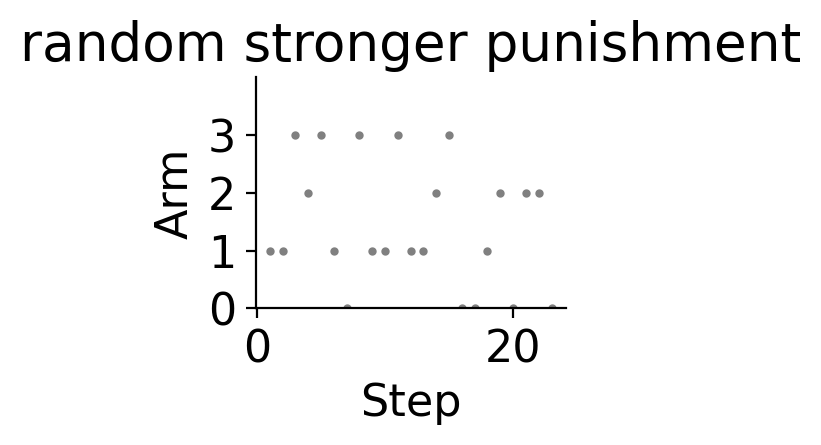

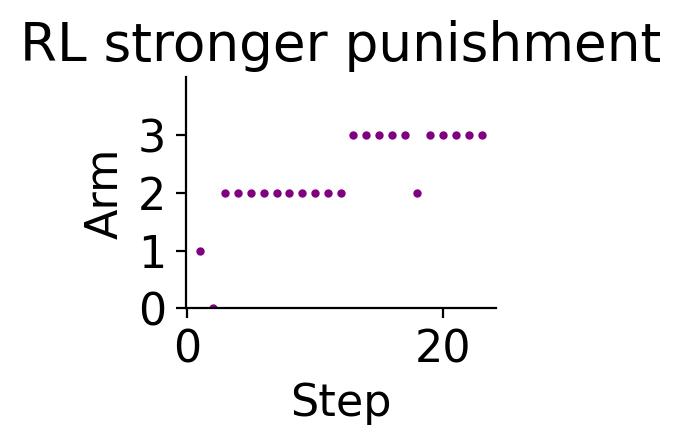

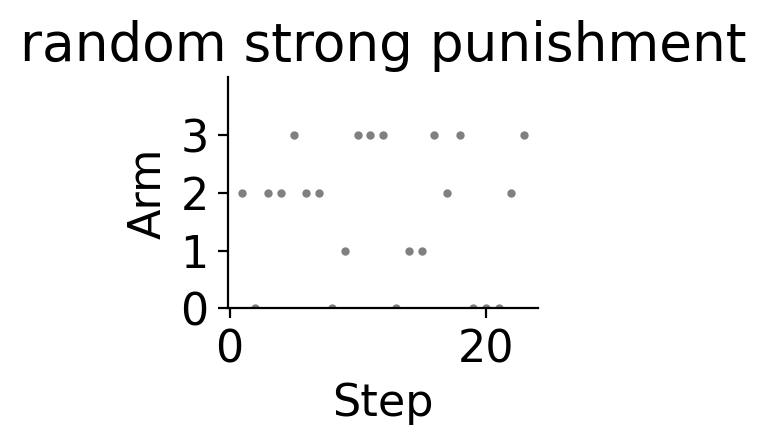

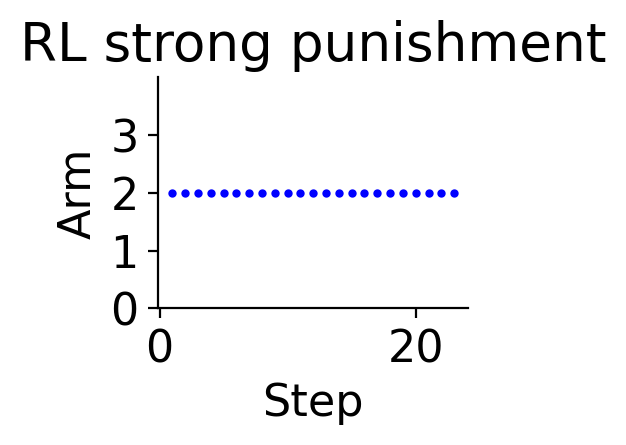

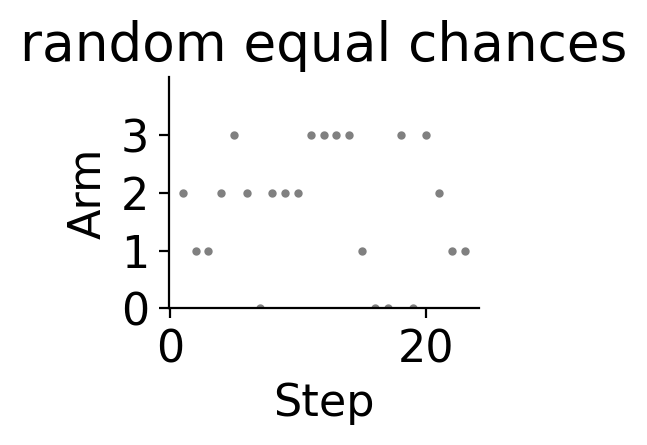

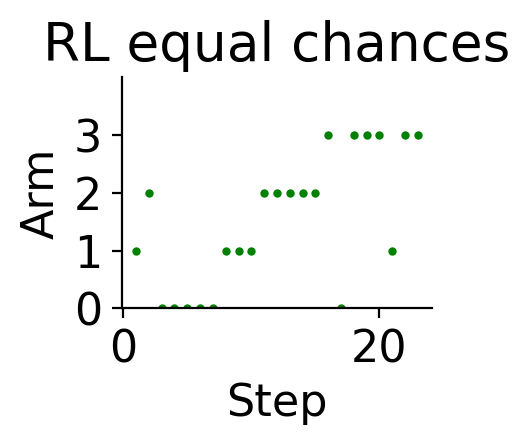

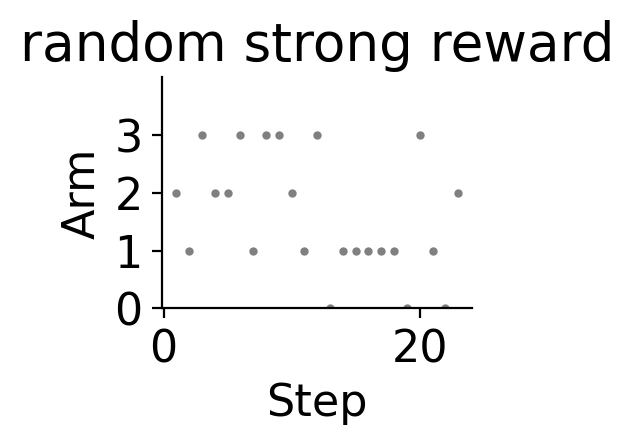

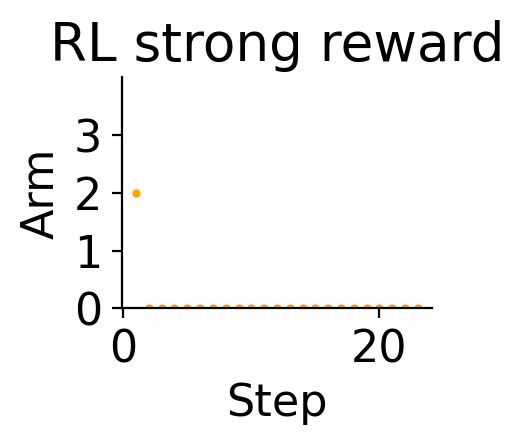

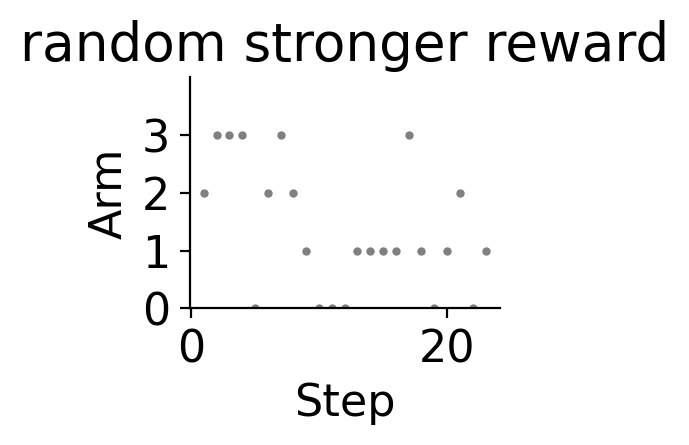

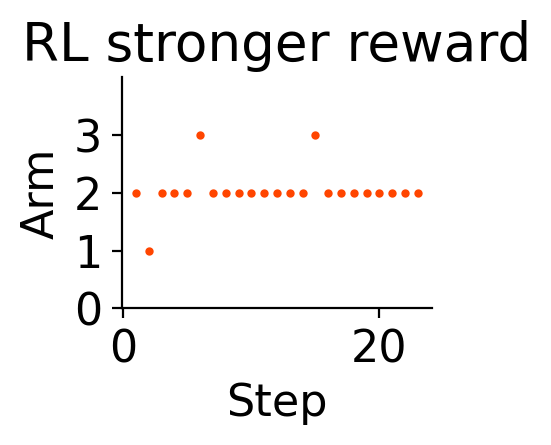

In [ ]:
num_experiment = 0 # which single run/experiment in the 100 we ran we're looking at

for name, res, color in zip(names_horizontal, results, colors):
    plot_bandit_actions(
        select_exp(res, num_experiment),
        num_arms=4,
        s=4,
        title=name,
        color=color,
        figsize=(2, 1.5)
        )

We notice that the RL agent generally chooses an arm and locks onto it, exploiting it for a while. When there is a strong/stronger punishment, it seems to have found and exploited the optimal arm (Arm 2) for a while. This is also true when there is a stronger reward. So in these cases, the RL agent does much better than the Rando agent which only chooses the optimal arm about 1/4 of the time. However, it's clear that the RL agent doesn't always find the optimal arm--when there is a "strong" reward, it locks onto Arm 0, a nonoptimal arm. We also notice that when there is an equal chance of punishment/reward in the nonoptimal arms, the RL agent struggles to find Arm 2, indicated by how it exploits each arm only a little bit. So it's exploitave behavior doesn't always result in success.

However, this is only one run of the experiment, so some of this could be due to chance. Let's look at how well the RL agent does on average over 100 runs/experiments and how it compares to the Rando agent in each of those runs to see if there are any true trends in how probabilities of reward/punishment in the nonoptimal arms might affect the agent's performance.

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

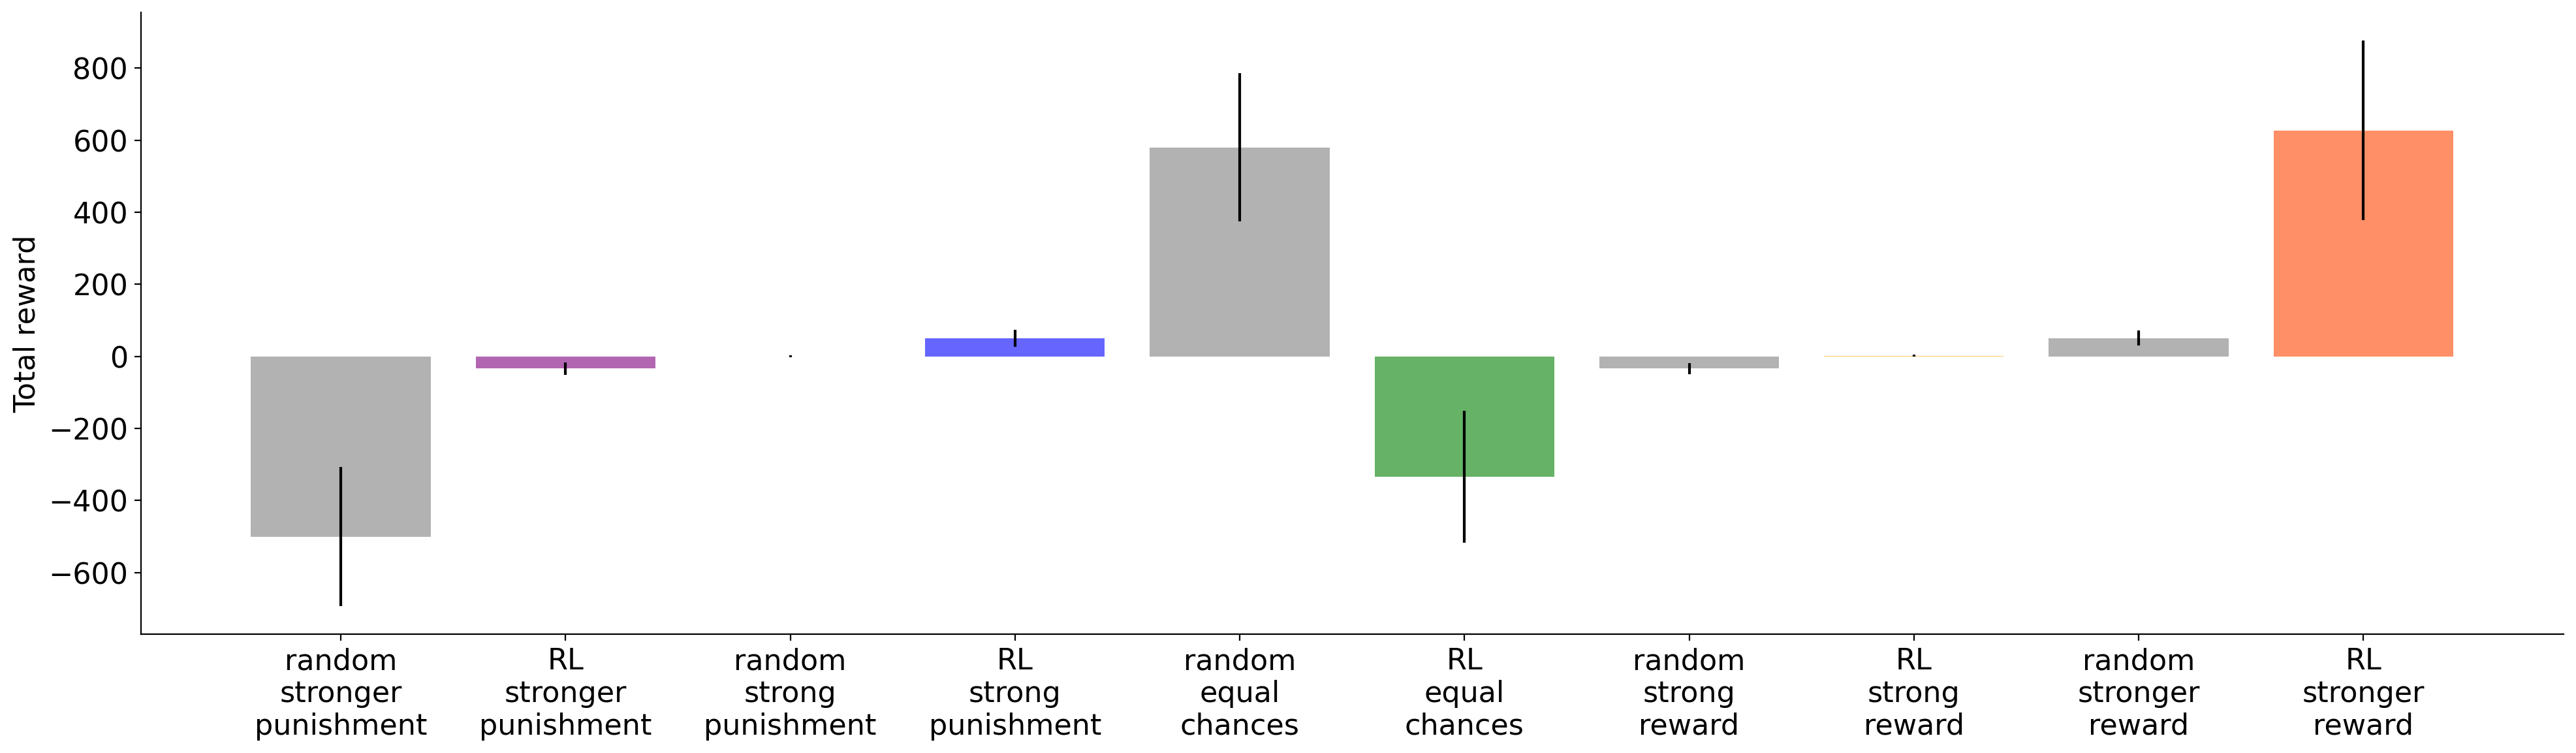

In [ ]:
# Score
scores = []
for name, res, color in zip(names_vertical, results, colors):
    r = total_reward(res)
    scores.append(r)

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names_vertical, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(20, 6))
plt.bar(names_vertical, m, yerr=sd, color=colors, alpha=0.6)
plt.ylabel("Total reward")
plt.tight_layout()
sns.despine()

### Conclusion 1 ###
We notice that in every environment where the probabilities of reward and punishment in the nonoptimal arms are unbalanced/not similar (eg stronger chance of punishment or stronger chance of reward), the RL agent does significantly better than the Rando agent because its average total reward is higher. However, in the environment where the probabilities of reward and punishment in the nonoptimal arms are about equal, the RL agent does significantly worse than the Rando agent (the average total reward is lower).

Now that we've seen what happens when we adjust the probabilities of reward and punishment in the nonoptimal arms, let's consider what happens when we change parameters of the optimal arm.

## Section 2 - Punishment Probabilities of Optimal Arm
In this section, we adjust the parameters of the best arm by varying its probability of punishment. To compare how the RL and random agents perform under different likelihoods of punishment, we consider the following scenarios while keeping the probability of reward constant at 0.5:

Punishment for best arm: [0, 0.1, 0.2, 0.3, 0.4, 0.5]




First, let's create our environments so we can run our rando and RL agents on them!

In [ ]:
# Let's create the environments and store them in a list

# list containing the different probability sets we use to create the environment
# each probability set is stored as a list: [best_reward, best_punishment]
p_bests = [ [0.5, 0],
            [0.5, 0.1],
            [0.5, 0.2],
            [0.5, 0.3],
            [0.5, 0.4],
            [0.5, 0.5] ]

environments = [] # list of environments
env_names = ["0", ".1", "0.2", "0.3", "0.4", "0.5"]

for p_best in p_bests:
  env = BanditPunishmentUniform4(p_min_reward=.1, p_max_reward=.3,
                               p_min_punishment=.1, p_max_punishment=.3,
                               p_best_reward=p_best[0], p_best_punishment=p_best[1],
                               reward_val=1, punishment_val=-1)
  environments.append(env)

Before we run our agents, let's better visualize what each of our five environments look like by creating a graph of the expected value of each arm. Remember, the optimal arm is arm 2.

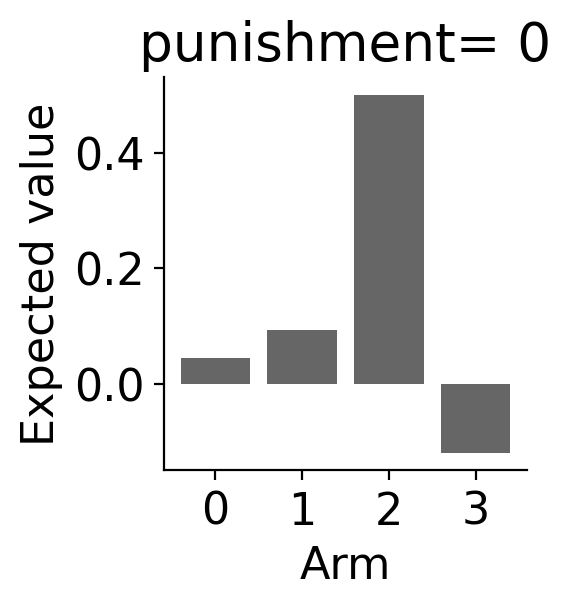

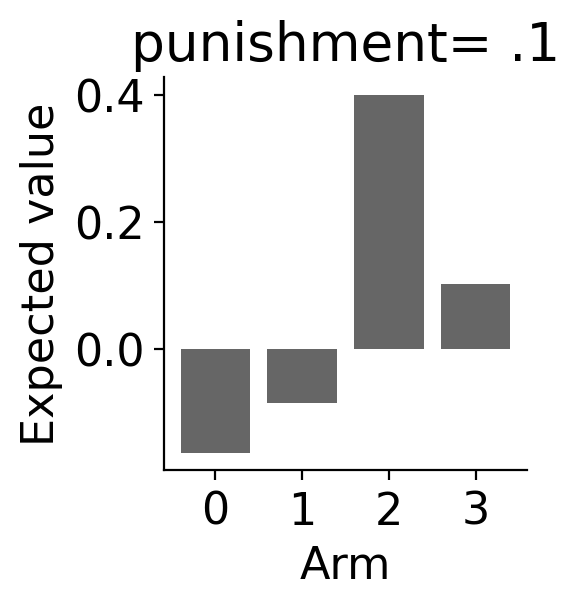

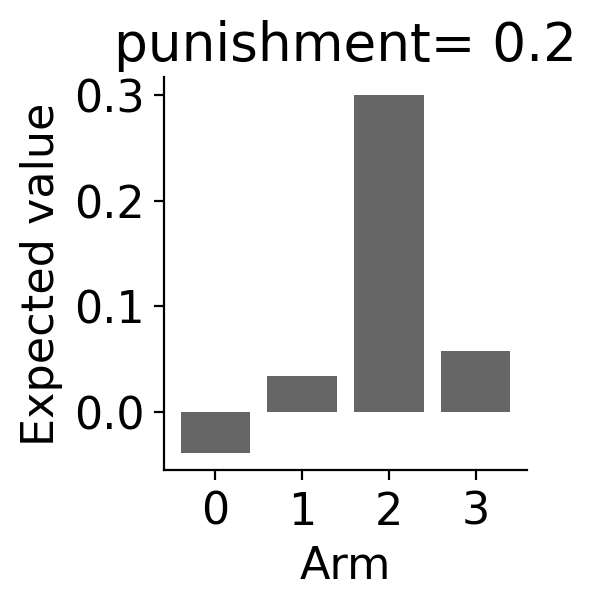

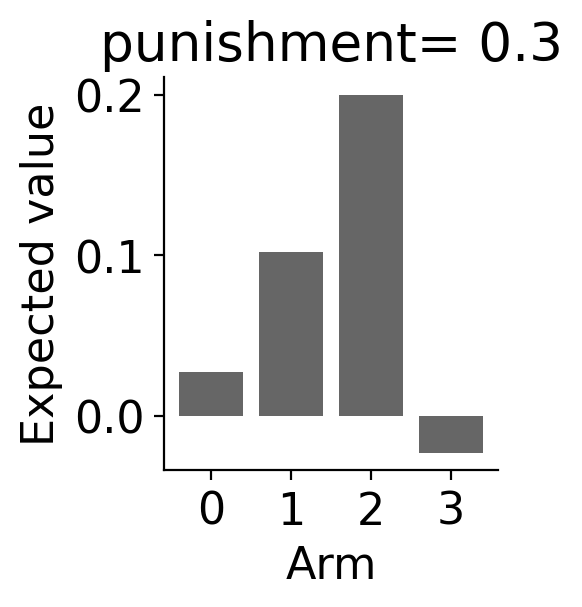

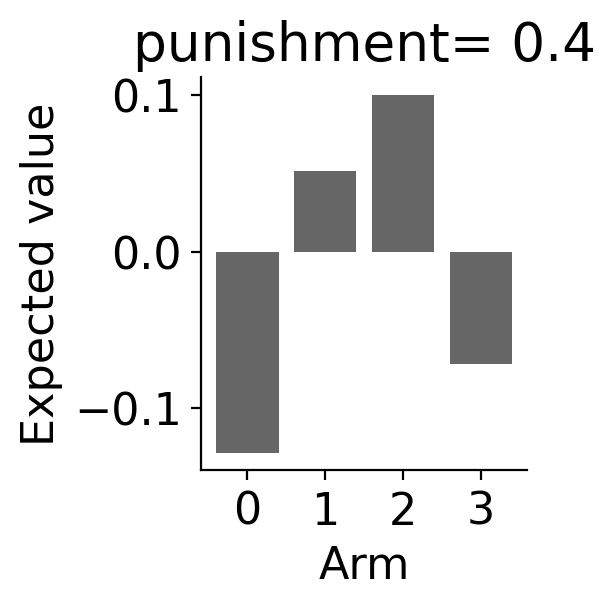

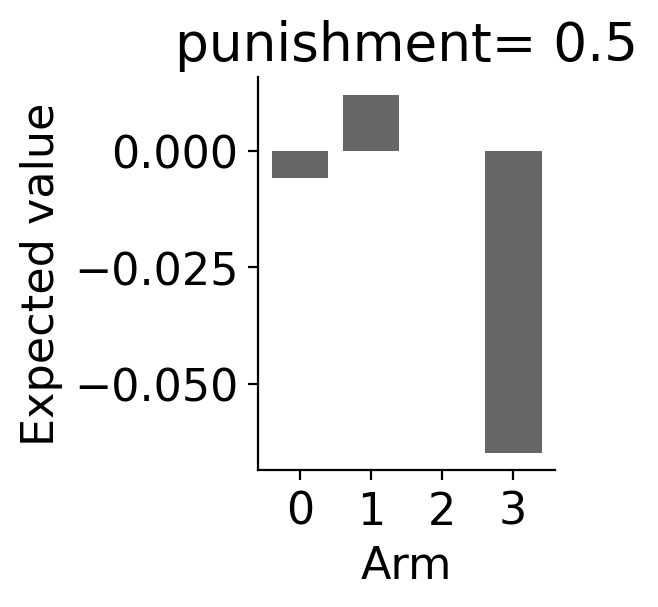

In [ ]:
# Let's visualize what each of our environments look like by seeing the expected values of each arm

num_experiments = 100
seed = 5030

i = 0
for env in environments:
  env.seed(seed)
  plot_bandit_punishment(env, alpha=0.6, title="punishment= "+env_names[i])
  i += 1

As the reward (eg "Stronger Reward Chance") increases for the nonoptimal arms, you can see the expected value of the nonoptimal arms (Arm 0, 1, and 3) creep up closer to the expected value of the optimal arm (Arm 2).

Now that we have our environments set up, let's create our agents. As previously stated in the Agents section, we have two agents: the RandomActor (our rando agent) and the EpsilonActor (our RL agent).

In [ ]:
# Creating our two agents using each environment's number of inputs

ran = BanditActorCritic(
    RandomActor(num_actions=env.num_arms),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

epy = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=0.15),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# Setting up lists to make plotting easier later
agents = [ran, epy, ran, epy, ran, epy, ran, epy, ran, epy, ran, epy]
names_vertical = ["random\npunishment: 0", "RL\npunishment: 0",
         "random\npunishment: 0.1", "RL\npunishment: 0.1",
         "random\npunishment: 0.2", "RL\npunishment: 0.2",
         "random\npunishment: 0.3", "RL\npunishment: 0.3",
         "random\npunishment: 0.4", "RL\npunishment: 0.4",
         "random\npunishment: 0.5", "RL\npunishment: 0.5"]
names_horizontal = ["random punishment: 0", "RL punishment: 0",
         "random punishment: 0.1", "RL punishment: 0.1",
         "random punishment: 0.2", "RL punishment: 0.2",
         "random punishment: 0.3", "RL punishment: 0.3",
         "random punishment: 0.4", "RL punishment: 0.4",
         "random punishment: 0.5", "RL punishment: 0.5"]
colors = ["gray", "purple", "gray", "blue", "gray", "green", "gray", "orange", "gray", "orangered", "gray", "magenta"]

Let's run out our two agents on each of our five environments (each a 4-armed bandit task). Let's run this experiment 100 times.

In [ ]:
num_steps = 24 # Number of choices each agent gets to make, (about 6 per arm)

results = []

i = 0
for name, agent in zip(names_vertical, agents):
  env = environments [i % 5]
  log = experiment(
      f"{name}",
      agent,
      env,
      num_steps=num_steps,
      num_experiments=num_experiments,
      dump=False,
      split_state=False,
      )
  results.append(log)
  i += 1

random
punishment: 0:   0%|          | 0/100 [00:00<?, ?it/s]

RL
punishment: 0:   0%|          | 0/100 [00:00<?, ?it/s]

random
punishment: 0:   0%|          | 0/100 [00:00<?, ?it/s]

RL
punishment: 0:   0%|          | 0/100 [00:00<?, ?it/s]

random
punishment: 0:   0%|          | 0/100 [00:00<?, ?it/s]

RL
punishment: 0:   0%|          | 0/100 [00:00<?, ?it/s]

random
punishment: 0:   0%|          | 0/100 [00:00<?, ?it/s]

RL
punishment: 0:   0%|          | 0/100 [00:00<?, ?it/s]

random
punishment: 0:   0%|          | 0/100 [00:00<?, ?it/s]

RL
punishment: 0:   0%|          | 0/100 [00:00<?, ?it/s]

random
punishment: 0:   0%|          | 0/100 [00:00<?, ?it/s]

RL
punishment: 0:   0%|          | 0/100 [00:00<?, ?it/s]

Let's break this down to look at what happened in a single experiment/run by plotting action choices with time (aka steps).

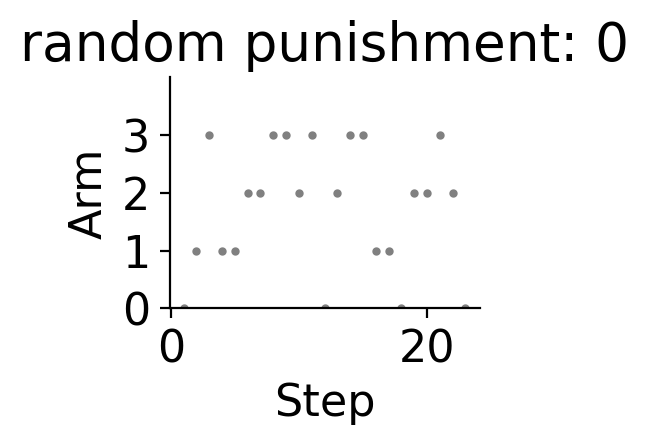

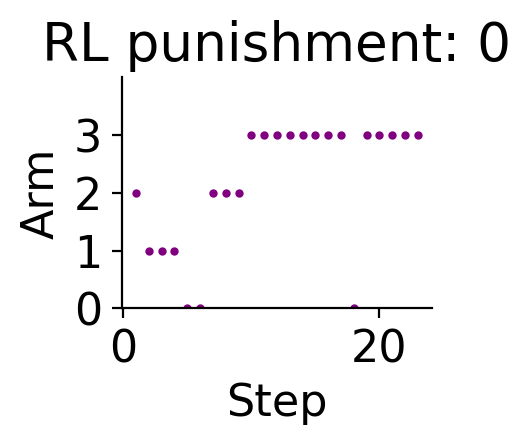

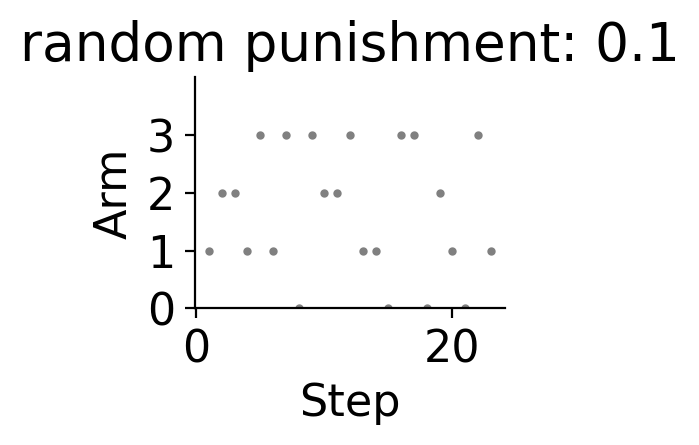

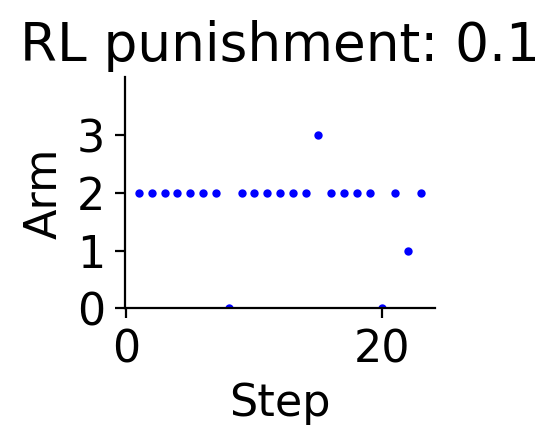

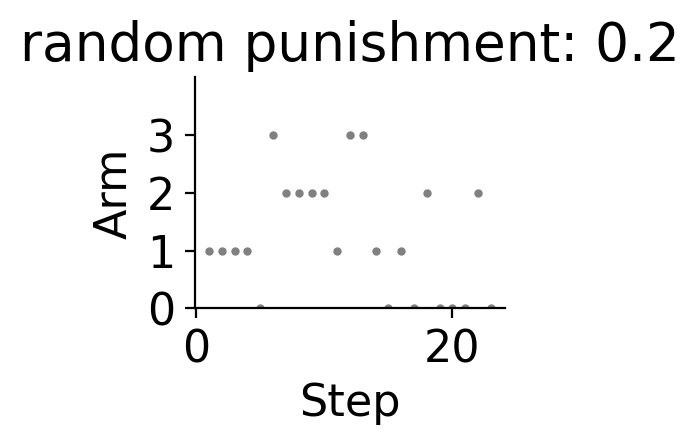

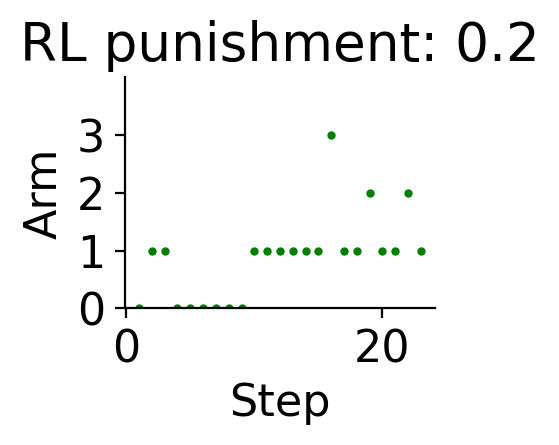

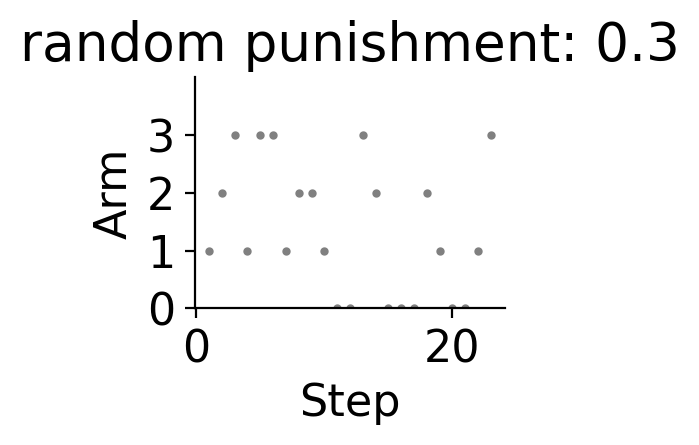

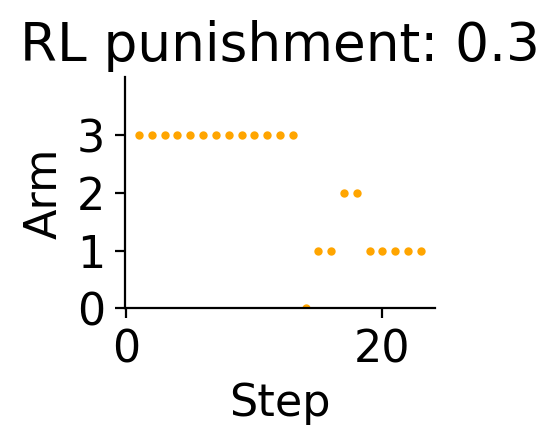

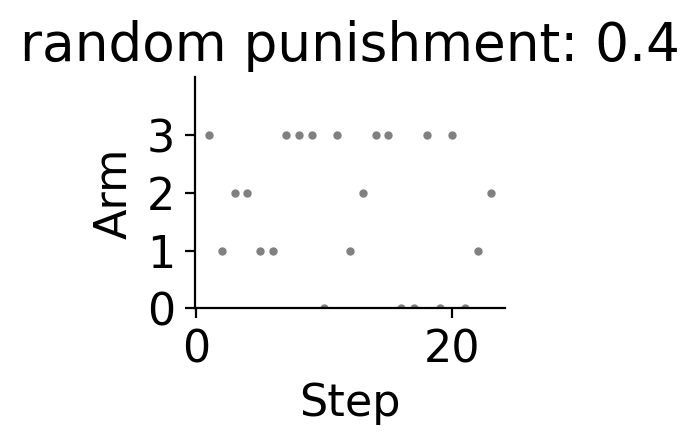

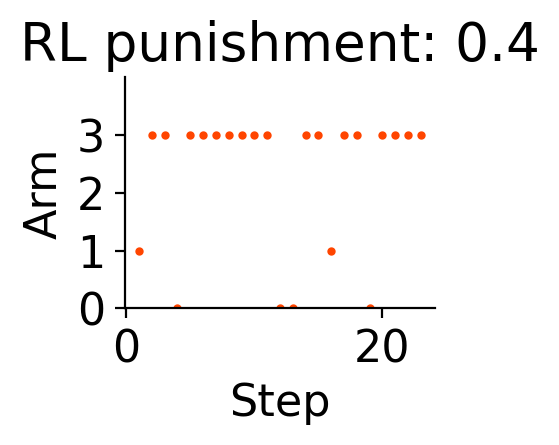

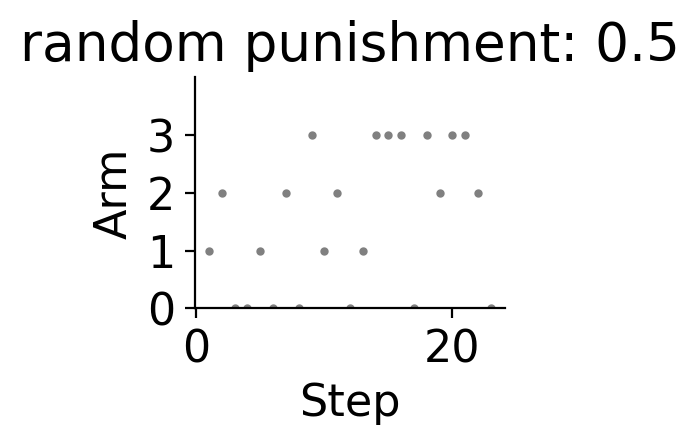

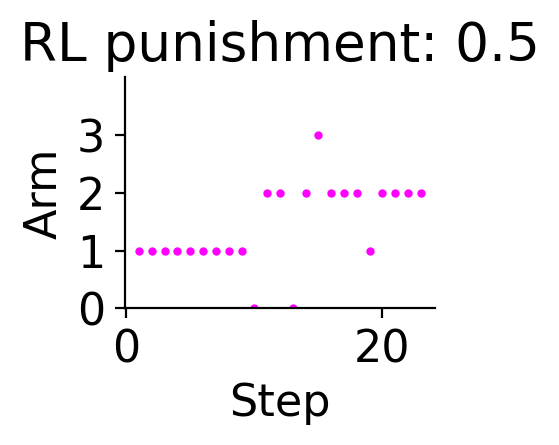

In [ ]:
num_experiment = 0 # which single run/experiment in the 100 we ran we're looking at

for name, res, color in zip(names_horizontal, results, colors):
    plot_bandit_actions(
        select_exp(res, num_experiment),
        num_arms=4,
        s=4,
        title=name,
        color=color,
        figsize=(2, 1.5)
        )

From these dot plots, it looks like the RL agent tends to lock onto one arm and exploit it across all punishment environments (rando agent is choosing randomly at all punishment probabiltiies as expected). However, there is no clear or consistent trend across the 6 punishment probabilities. For example, when the probability of punishment is low (e.g. 0), the RL agent fails to identiy the optimal arm. Similarly, at higher punishment probabilities, the RL agent did not lock on to the optimal arm either. This variability makes it challenging to draw definitive conclusions.

To address this, we decided to look at the average behavior across 100 experiments to help draw a clearer conclusion.

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

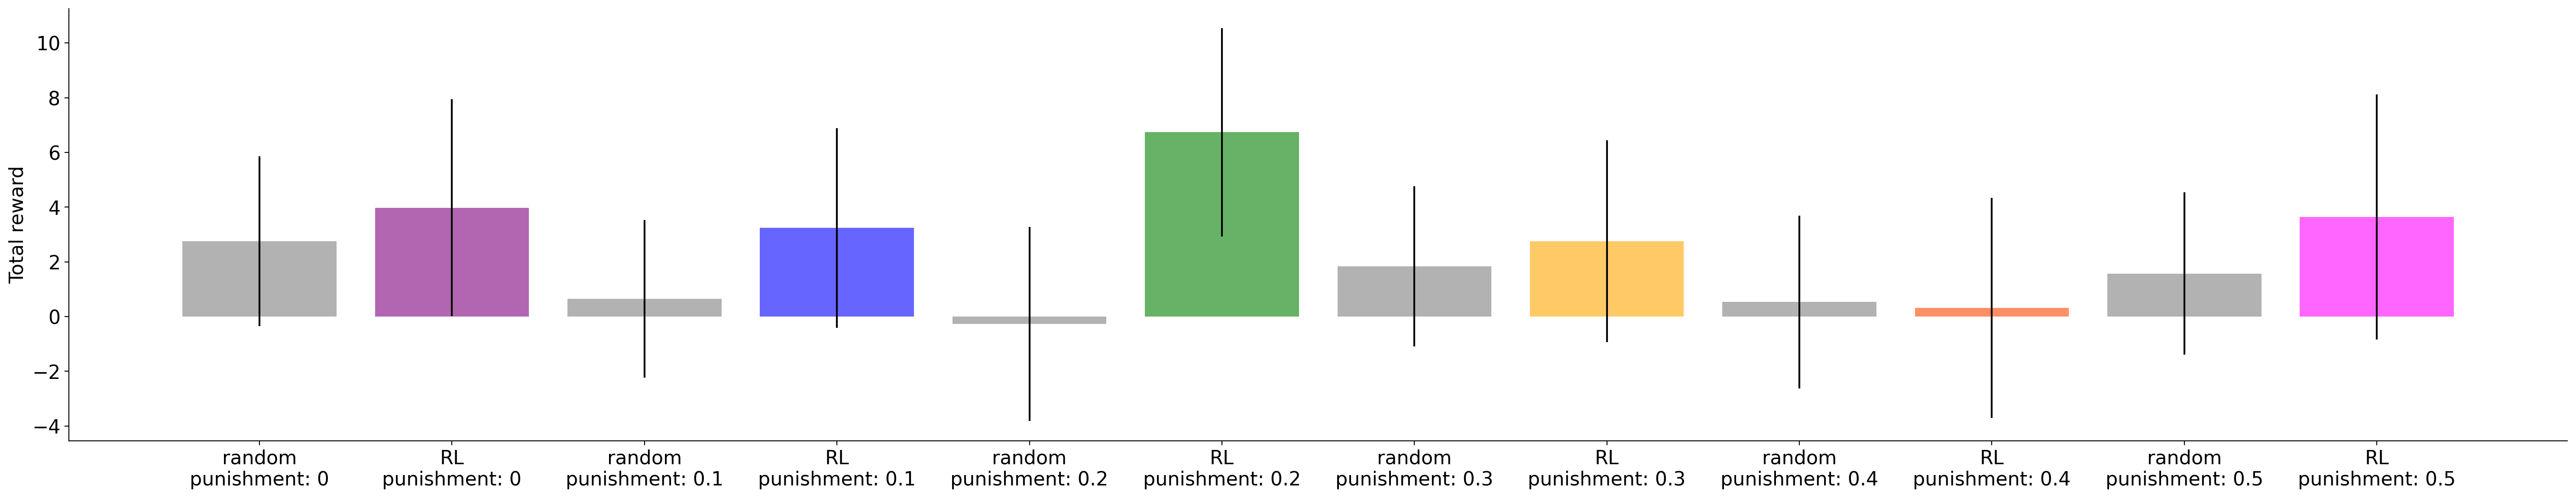

In [ ]:
# Score
scores = []
for name, res, color in zip(names_vertical, results, colors):
    r = total_reward(res)
    scores.append(r)

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names_vertical, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(30, 6))
plt.bar(names_vertical, m, yerr=sd, color=colors, alpha=0.6)
plt.ylabel("Total reward")
plt.tight_layout()
sns.despine()

### Conclusion 2 ###

The RL agent consistently outperforms the Rando agent across all punishment probabilities, with the exception of a slight dip at the punishment probability of 0.4. However, this difference does not appear significant, especially considering the error bars for both agents. Furthermore, increasing the probability of punishment does not seem to affect the total reward the RL agent acquired. This contradicts our hypothesis as the RL agent performed better than the Rando agent at all punishment probabilties, even at higher punishment probabilities.

Interestingly, the RL agent did not the least total reward at higher punishment probabilities nor the most reward at zero/lower punishment probabiltity. This could be because the RL agent develops varying strategies to adapt to different punishment environments, learning to explore vs exploit accordingly. For instance, when the probability of punishment is higher, the agent could become more conservative and try to obtain more consistent reward, even though it may not come from the optimal arm.

Next, we will consider what happens if we vary the amount of reward and punishment in the task.

## Section 3 - Value of Reward & Punishment
Building upon seeing the change caused by changing the probabilities of rewards and punishments in Sections 1 and 2, Section 3 is focused on what the actual *value* is of reward and punishment in the task.

To observe and analyze how the agents respond to different values (specifically, differing proportions between the two), we are breaking up the distribution of these as follows:

**"Heaviest" Punishment**

Reward: 1

Punishment: -100

**"Heavy" Punishment**

Reward: 1

Punishment: -10

**Base**

Reward: 1

Punishment: -1

**"Heavy" Reward**

Reward: 10

Punishment: -1

**"Heaviest" Reward**

Reward: 100

Punishment: -1


First, let's establish the environments for our two agents.

In [ ]:
# Let's create the environments and store them in a list

# list containing the different probability sets we use to create the environment
# each probability set is stored as a list: [value, punishment]
value_ranges = [ [1, -100],
                 [1, -10],
                 [1, -1],
                 [10, -1],
                 [100, -1] ]

environments = [] # list of environments
env_names = ["Heaviest Punishment", "Heavy Punishment", "Base", "Heavy Reward", "Heaviest Reward"]

for value_range in value_ranges:
  env = BanditPunishmentUniform4(p_min_reward=.1, p_max_reward=.3,
                               p_min_punishment=.1, p_max_punishment=.3,
                               p_best_reward=0.35, p_best_punishment=0.15,
                               reward_val=value_range[0], punishment_val=value_range[1])
  environments.append(env)


Let's visualize what each of our environments look like by seeing the expected values of each arm


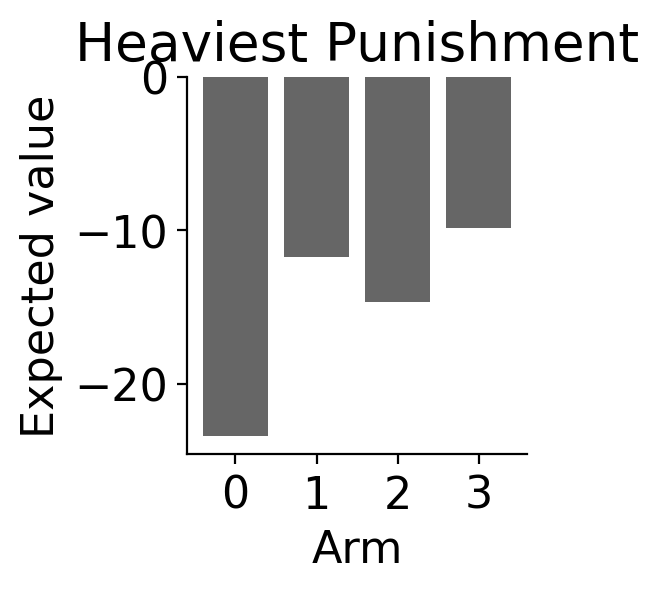

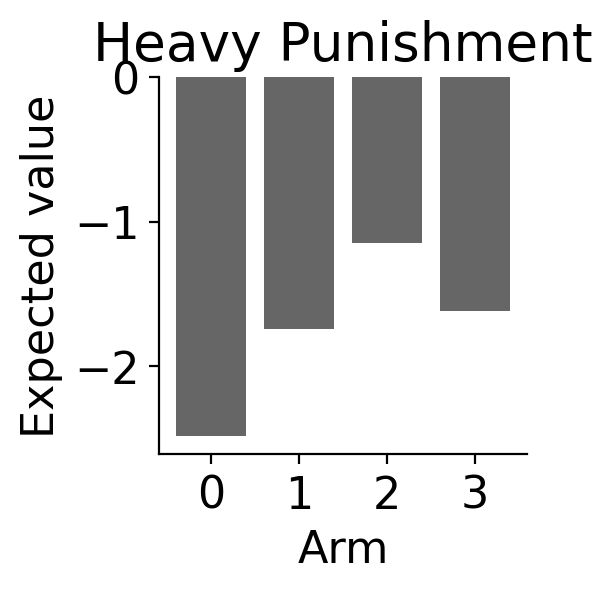

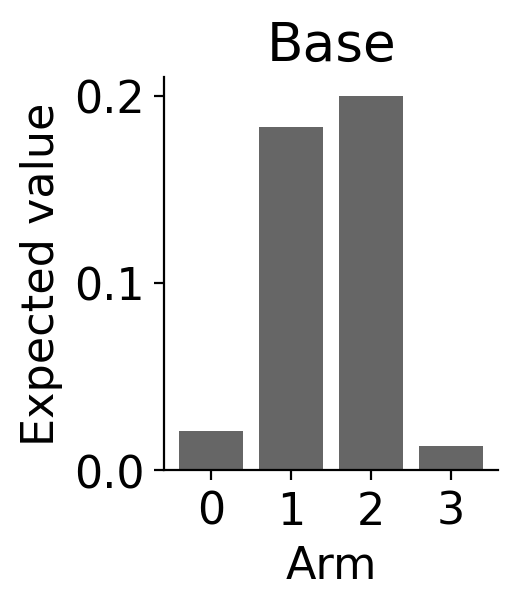

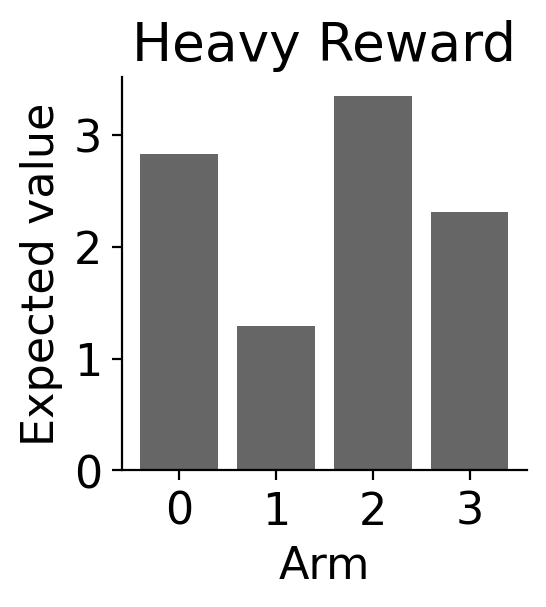

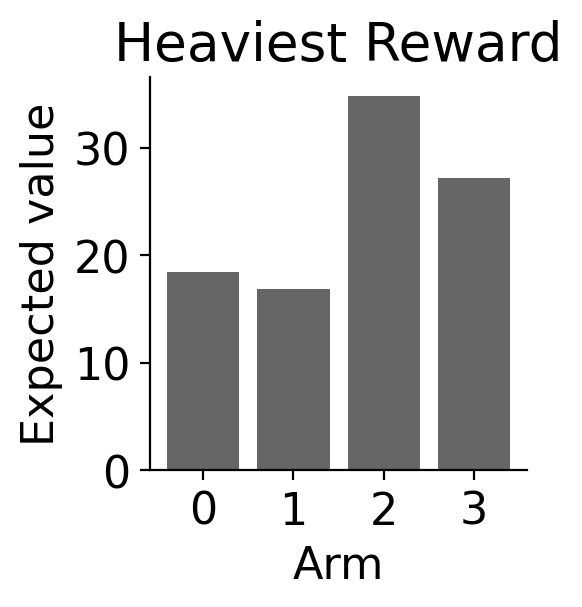

In [ ]:
num_experiments = 100
seed = 5030

i = 0
for env in environments:
  env.seed(seed)
  plot_bandit_punishment(env, alpha=0.6, title=env_names[i])
  i += 1

Here we can see that as punishment increases, the expected value of each arm decreases. The opposite effect is seen as reward increases.

Now, let's add our two agents and run them in our environments. Let's run this experiment 100 times.

In [ ]:
# Creating our two agents using each environment's number of inputs

ran = BanditActorCritic(
    RandomActor(num_actions=env.num_arms),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

epy = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=0.15),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# Setting up lists to make plotting easier later
agents = [ran, epy, ran, epy, ran, epy, ran, epy, ran, epy]
names_vertical = ["random\nheaviest\npunishment", "RL\nstronger\npunishment",
         "random\nheavy\npunishment", "RL\nheavy\npunishment",
         "random\nbase", "RL\nbase",
         "random\nheavy\nreward", "RL\nheavy\nreward",
         "random\nheaviest\nreward", "RL\nheaviest\nreward"]
names_horizontal = ["random heaviest punishment", "RL stronger punishment",
         "random heavy punishment", "RL heavy punishment",
         "random base", "RL base",
         "random heavy reward", "RL heavy reward",
         "random heaviest reward", "RL heaviest reward"]
colors = ["gray", "purple", "gray", "blue", "gray", "green", "gray", "orange", "gray", "orangered"]

In [ ]:
num_steps = 24  # Number of choices each agent gets to make, (about 6 per arm)

results = []

i = 0
for name, agent in zip(names_vertical, agents):
  env = environments[i % 5]
  log = experiment(
      f"{name}",
      agent,
      env,
      num_steps=num_steps,
      num_experiments=num_experiments,
      dump=False,
      split_state=False,
      )
  results.append(log)
  i += 1

random
heaviest
punishment:   0%|          | 0/100 [00:00<?, ?it/s]

RL
stronger
punishment:   0%|          | 0/100 [00:00<?, ?it/s]

random
heavy
punishment:   0%|          | 0/100 [00:00<?, ?it/s]

RL
heavy
punishment:   0%|          | 0/100 [00:00<?, ?it/s]

random
base:   0%|          | 0/100 [00:00<?, ?it/s]

RL
base:   0%|          | 0/100 [00:00<?, ?it/s]

random
heavy
reward:   0%|          | 0/100 [00:00<?, ?it/s]

RL
heavy
reward:   0%|          | 0/100 [00:00<?, ?it/s]

random
heaviest
reward:   0%|          | 0/100 [00:00<?, ?it/s]

RL
heaviest
reward:   0%|          | 0/100 [00:00<?, ?it/s]

Let's break this down to look at what happened in a single experiment/run by plotting action choices with time (aka steps).

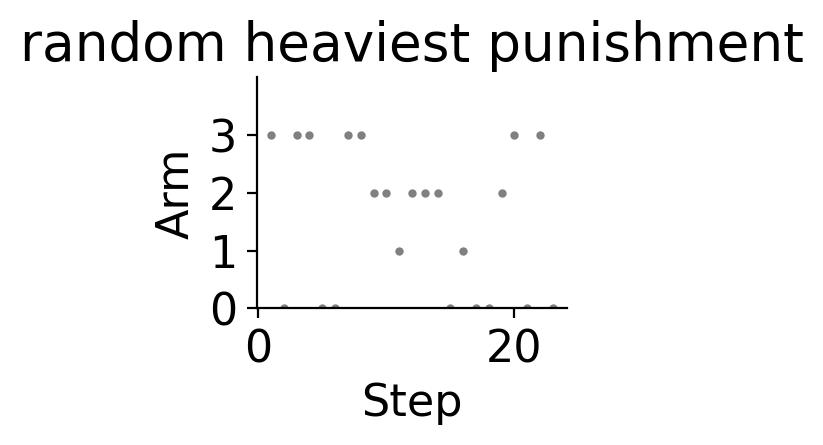

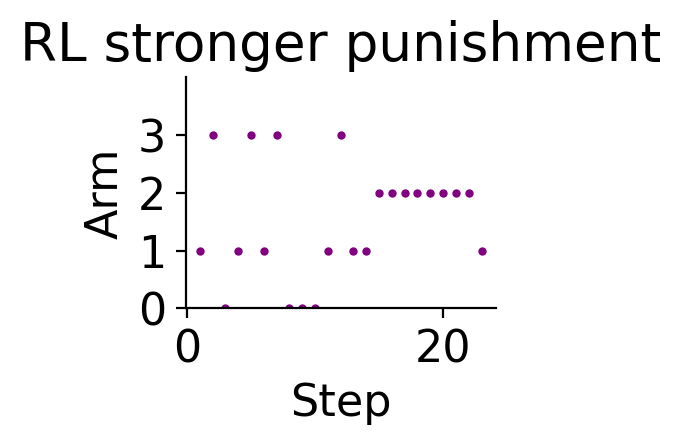

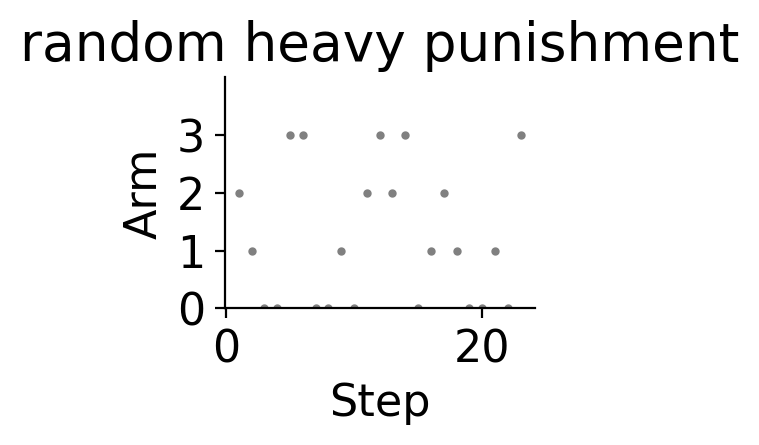

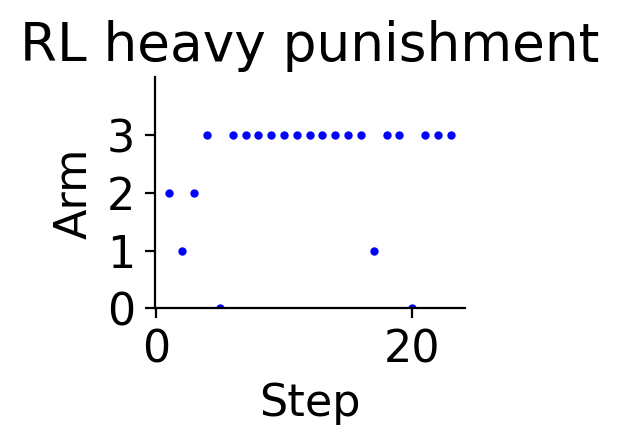

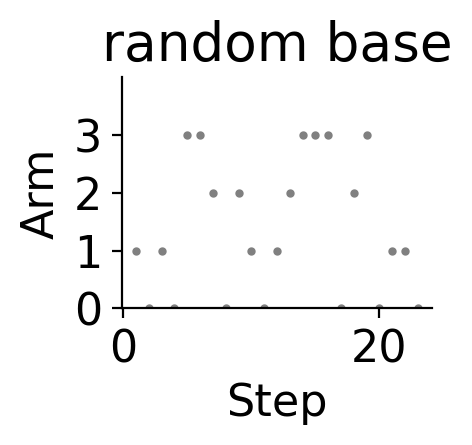

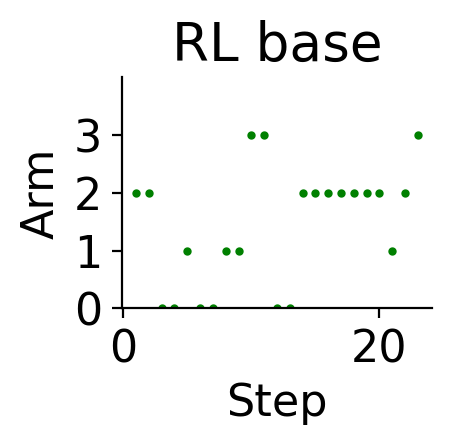

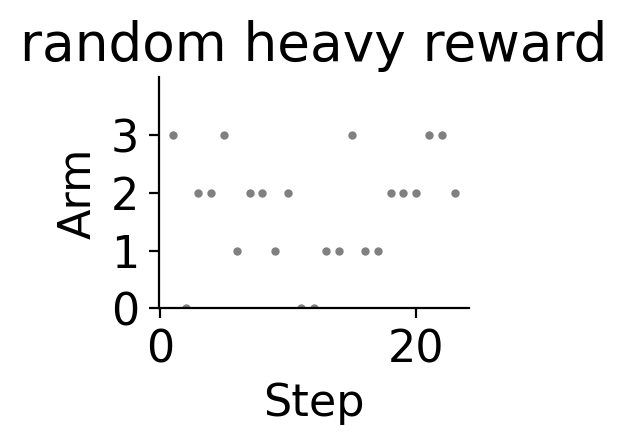

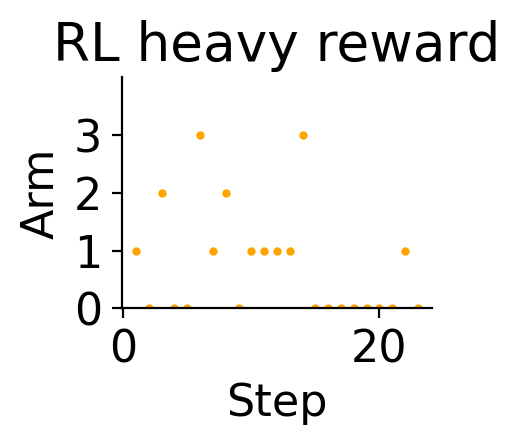

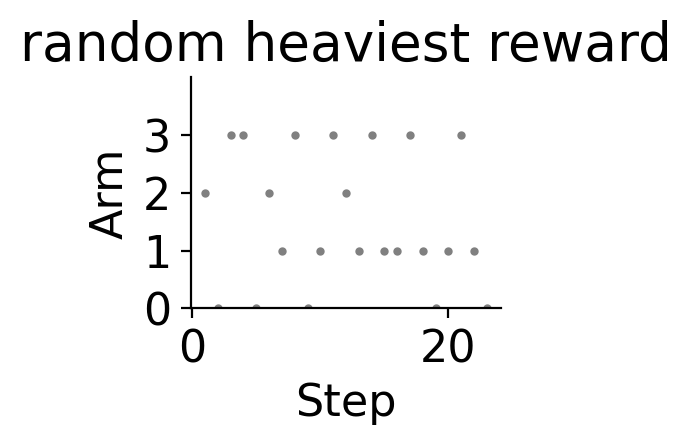

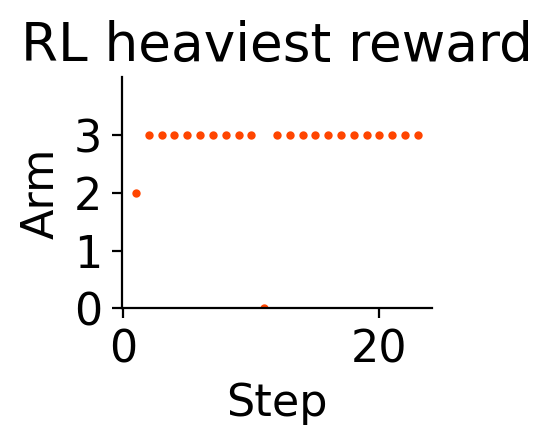

In [ ]:
num_experiment = 0 # picking a random single run/experiment of the 100 to look at

for name, res, color in zip(names_horizontal, results, colors):
    plot_bandit_actions(
        select_exp(res, num_experiment),
        num_arms=4,
        s=4,
        title=name,
        color=color,
        figsize=(2, 1.5)
        )

By looking at just one experiment, there is not a clear pattern of behavior performed by the RL agent. It appears to lock onto an arm in some instances -- like when the value of reward is +100 or when punishment is -100 -- but this is the only visible trend possible.

As such, we must run more experiments and average the behavior seen across these 5 environments:

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

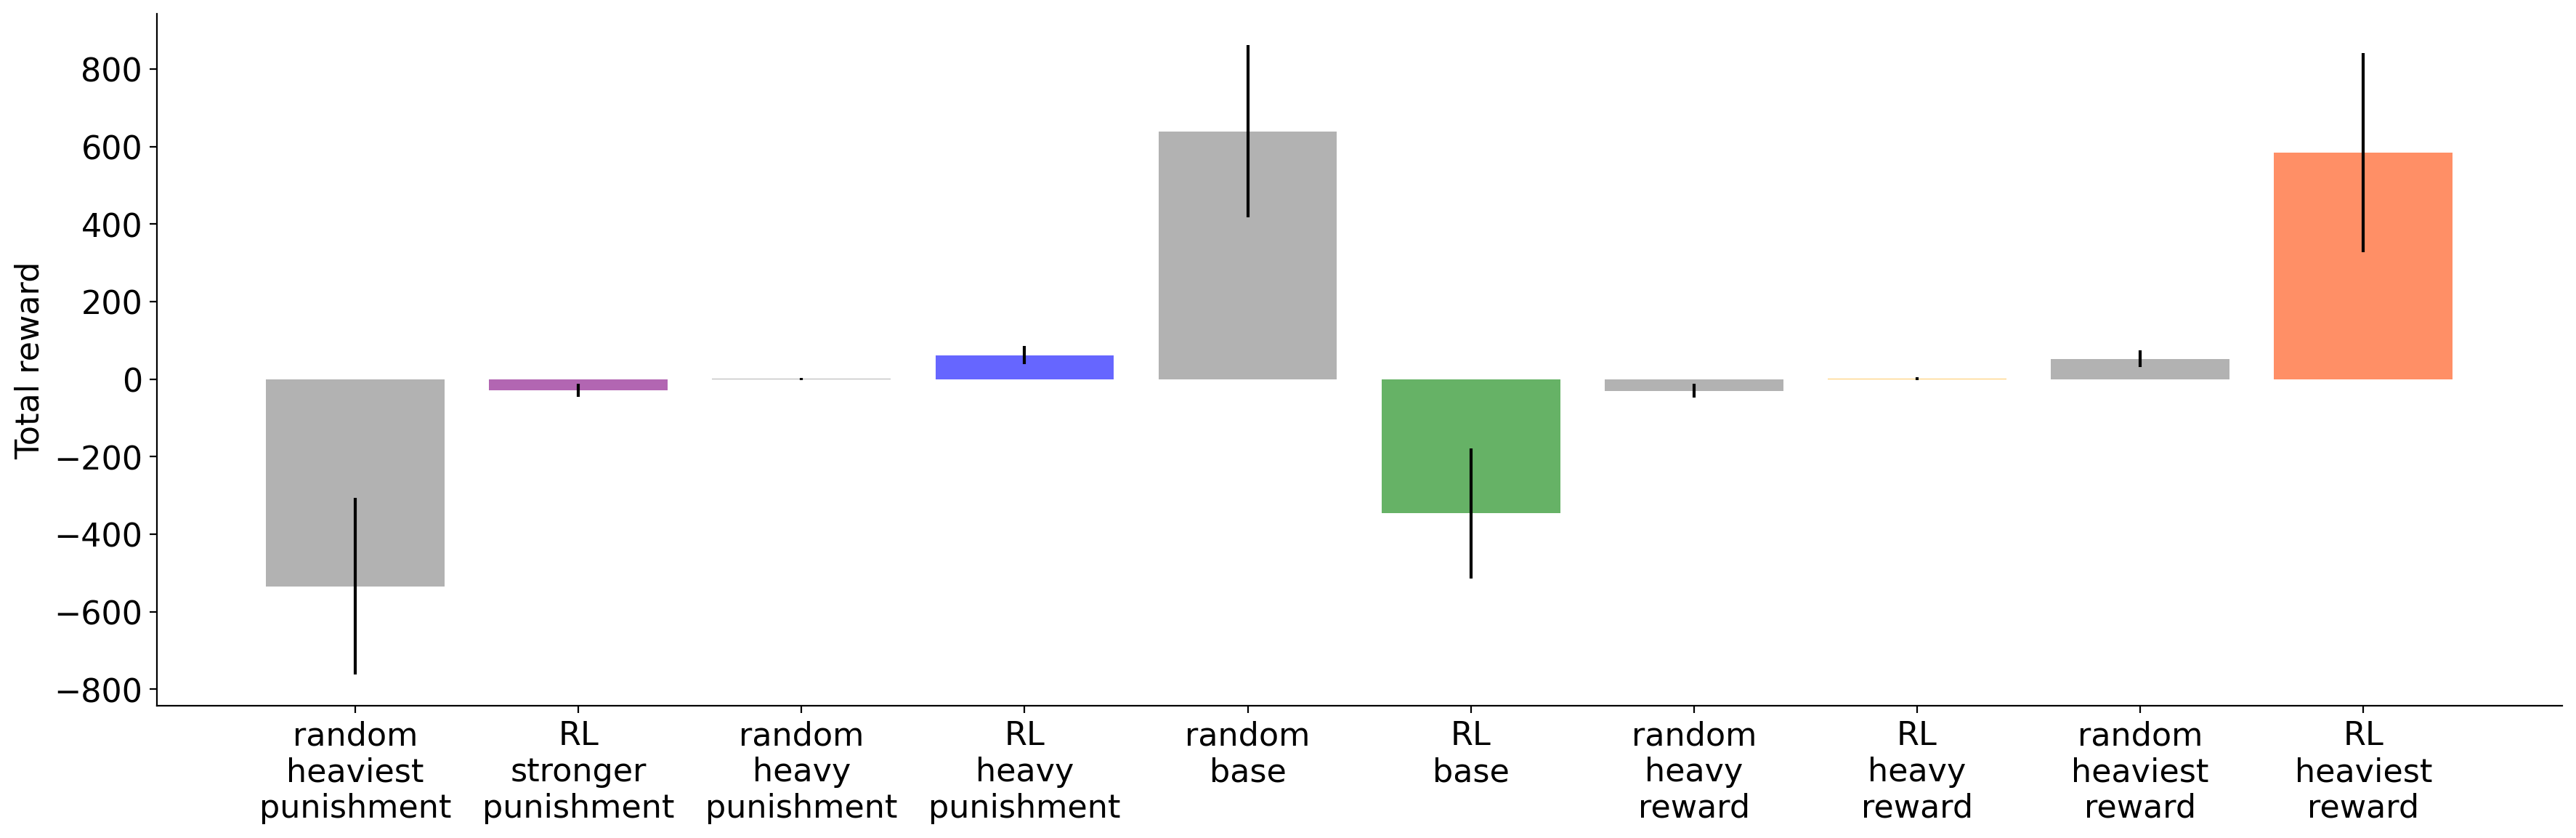

In [ ]:
# Score
scores = []
for name, res, color in zip(names_vertical, results, colors):
    r = total_reward(res)
    scores.append(r)

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names_vertical, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(18, 6))
plt.bar(names_vertical, m, yerr=sd, color=colors, alpha=0.6)
plt.ylabel("Total reward")
plt.tight_layout()
sns.despine()

### Conclusion 3

In this set of data, we can see the trend of RL and Rando agent behavior. At heavy punishment values (-100 and -10), the RL agent greatly outperforms the Rando agent over 100 experiments.

Interestingly enough, at the Base values (reward +1 and punishment -1) the RL agent received more punishment than reward. Hence, it was greatly outperformed by the Rando agent.

As the value of reward increases, we see the same effect as when punishment increases. The RL agent outperformed the Rando in both the heavy and heaviest reward conditions. The total reward for the heaviest reward condition appears to be the most, but also the reward value increased to 100. Therefore, we can conclude the total reward obtained by the agent was closer to that of the heavy punishment condition (still positive and more so than Rando, just not as extreme).

Overall, across the 5 environments when averaged to 100 experiments, it seems as though the agent performs much better when the value of punishment and reward is not equal compared to the Rando agent.

## Interpretation of Conclusions

1. In Section 1, we concluded that the RL agent performs significantly worse than the Rando agent when the probabilities of reward and punishment in the optimal arm are similar, but it performs better when these probabilities are not similar. So, while it is true that the RL agent performs better than the Rando agent when there is a higher probability of punishment in line with our hypothesis, it is not true that the RL agent performs similar to or worse than the Rando agent when there is a higher probability of reward; thus, we disprove our hypothesis. This suggests that the RL agent doesn't struggle to distinguish between the optimal and nonoptimal arms, even when the chance of reward in the nonoptimal arms is high, or at least this doesn't affect it's overall performance. A possible reason why the RL agent performed worse than the Rando agent in terms of average total reward when the reward and punishment had equal chances could be that the RL agent didn't know how to weigh the punishment and reward and got confused. Seeing the punishment may have "cancelled out" the optimal arm's rewards (since they are of equal magnitude), so the RL agent struggled to see the rewarding nature of the optimal arm.

2. From Section 2, we concluded that the RL agent consistently outperforms the Rando agent at all punishment probabilities. Even as chances of punishment increases, the RL agent adapts and obtains more total reward than the Rando agent. This disproves our intial hypothesis. This suggests that the RL agent is capable of learning strategies to balance risk and reward effectively, even as the enviornment gets more challenging. This adaptability may indicate that the RL agent develops dynamic strategies tailored to different punishment conditions, adjusting its exploration and exploitation behavior accordingly. For instance, at higher punishment probabilities, the agent might adopt a more conservative approach to secure consistent rewards, even if they do not come from the optimal arm.Further work can be conducted in the future to better understand the mechanisms underlying the RL agent's adaptability and strategy development.

3. Section 3 showed us the RL agent performs significantly better than the Rando agent when the value of punishment and reward is not equal. However, the RL agent performed significantly worse when the value of reward and punishment is the same. This is somewhat in line with the hypothesis stated at the beginning of these projects, however it is not completely accepted. Before running, we hypothesized: The RL agent will perform better than the Rando agent when the magnitude of punishment is high and the RL agent will perform worse than the Rando agent when the magnitude of the reward is high in the bandit task. Of course, the RL agent performed better than the Rando when *both* reward and punishment were higher, but was outperformed by the Rando at Base. This could be because, when the value of reward and punishment is equal, the agent might get confused and become unsure of how to update the algorithm. When thinking about it, if the agent receives a reward and then a punishment, these balance out to a net zero. Maybe the algorithm is essentially not updating properly since there is an introduction of punishment. This could explain why the agent performs better when there is a reward and punishment it can detect, ie. when they are not the same value. Further exploration of this phenomenon could positively benefit future, more complex models of RL.

The main takeaway seems to be that that punishment only seems to affect a RL agent's performance (causing it to perform worse than the Rando agent rather than how it performs better usually) when the punishment is equal to the reward (eg similar in terms of probability or magnitude).

### Limitations
However, it is important to acknowledge that our conclusions cannot be generalized to all punishment and that there is limits to how it is generalized to the real world. Our model has limitations. For this experiment, we used a 4-armed bandit task so there are only 4 possible actions. However, in the real world, there are not only 4 discrete actions to be taken. There are usually many more so this is a simplified version. Thus, our conclusions likely hold only for scenarios of exploration where there are only a small number of discrete possible actions.

Additionally, in this four-armed bandit task, the agent only needed to maximise one measure: total reward. The agent only had to focus on one task and this is extremely simple, compared to the real world where there may be other tasks and factors that need to be considered.

Additionally, each trial of our model is essentially static. The selection of one arm does not change the probability of that arm nor does it change for the others. The parameters of the experiment are determined at the beginning of each run. This is a limitation as often, in the real world, conditions are constantly changing and are subject to alteration based on past decisions.

Finally, one of the biggest limitations of our model is the use of a singular epsilon value. Our sole use of a low epsilon value meant that there was not much exploration going on in the beginning, causing some variation in the results of our experiments. While these variations were smoothed out to an extent through many repeated trials, it would be beneficial to use different epsilon values or even a dynamic epsilon value. This is one possible direction for future work that may make this more applicable to real world applications.

### Future Work
This project leaves some follow-up questions about future work. It would be interesting to consider how our conclusions may hold in a bandit task with more arms to understand how an RL agent may perform compared to a Rando agent in an environment with puinshment when there are many more possible actions to take. Additionally, it would be interesting to explore how introducing punishment to a scent grid and other grid-like environments might affect the performance of the RL and Rando agents now that we know what happens in a bandit task. We could also investigate how the magnitude of reward/punishment might affect an RL agent's performance when the reward/punishment is similar. In this project, we only looked at the reward and punishment being of equal magnitude for one magnitude (1). Now that we know there is an effect when reward and punishment are similar, we can look at how changing reward and punishment together so that they are still similar to each other but different from how they were before might affect RL agent performance. Additionally, as mentioned in the limitations section, we could find a way to incorporate a dynamic environment to our bandit task or make use of a dynamic epsilon value in order to address the aforementioned limitations.